# list of negative words:

In [1]:
with open("Negative_words.txt", "r") as f:
    negText = f.read()
negTokens = negText.split("\n") # This splits the text file into tokens on the new line character
negTokens[-1:] = [] # This strips out the final empty item
print(negTokens[-10:])

['wretchedly', 'wretchedness', 'wrong', 'wrongful', 'wrought', 'wrought', 'yawn', 'zealot', 'zealous', 'zealously']


# list of positive words:

In [2]:
with open("Positive_words.txt", "r") as f:
    posText = f.read()
posTokens = posText.split("\n") # This splits the text file into tokens on the new line character
posTokens[-1:] = [] # This strips out the final empty item
print(posTokens[-10:])

['worthwhile', 'worthy', 'wow', 'wry', 'yearning', 'yearningly', 'youthful', 'zeal', 'zenith', 'zest']


# Calling the corpus:

In [3]:
with open("Providers_text2.txt", "r") as f:
    tweetsText = f.read()
tweetsTokens = tweetsText.split("\n") # This splits the text file into tokens on the new line character
tweetsTokens[-1:] = [] # This strips out the final empty item
print(tweetsTokens[:2])

['Tweet/Post', '"For many years, #JasperNP has held a Spring Flower Count. Volunteers & Parks staff collect data on the flowers that are blooming in the park, which is then used for climate change research as it helps describe ecological trends over time. "']


# Tokenizing reviews:

In [4]:
import re
def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def calculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
    
    sum = (numPosWords - numNegWords)
    return sum

# Here is a line for testing this
# print(calculator('Obama has called wrong wrong the GOP budget social Darwinism. Nice try, but they believe in social creationism.'))

# Number of total reviews, and Pos/Neg/Neutral reviews:

In [5]:
# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

# This prints out the results        
print("Total: " + str(numTweets) + "\n" + "Positive: " + str(numPosTweets) + "\n" + "Neutral: " + str(numNeutTweets) + "\n" + "Negative: " +str(numNegTweets))

Total: 602
Positive: 98
Neutral: 450
Negative: 54


# Examples of positive reviews:

In [6]:

# Here we set up the threshold.
posi = 1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numPosTweets = 0
posiTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi and numPosTweets < numberWanted:
        numPosTweets += 1
        posiTweetList.append(tweet)

print(posiTweetList)

['"Why is there still a fire ban in JNP? Since May 1, there has been an average of 66 mm of rainfall in the park. It will take almost the same amount of rain over 2 days to significantly change the moisture of medium & large fuels. Until then, the fire ban remains in effect. "', '"When the weather is warm, the thickness of natural ice can change from day to day"', 'Hi @kifehr The status of the fire ban is difficult to predict in advance as the weather and fuel conditions are always fluctuating. Fine fuels respond rapidly to changes in the environment; even if they are dampened by rain they can rebound given just one sunny day', '"The fire ban in #JasperNP, as well as the Municipality of Jasper, has been lifted. Thank you for your cooperation and support throughout this wildfire season. "']


# Examples of negative reviews:

In [7]:
# Here we set up the threshold.
nega = -1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numNegTweets = 0
negaTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc < nega and numNegTweets < numberWanted:
        numNegTweets += 1
        negaTweetList.append(tweet)

print(negaTweetList)

['"Snarl Peak Wildfire Update: Fire activity increased yesterday due to high temperatures, low humidity and high winds."', 'A fire ban for Jasper National Park is in effect. Fire danger is rated as extreme. Warm, mostly dry weather is anticipated to continue through the Labour Day weekend keeping the fire danger at extreme.', '· Report any wildfires, illegal campfires or suspicious smoke to Parks Canada Dispatch: 780-852-6155.', 'Road construction makes for an added challenge in the daily lives of small terrestrial animals such as ground squirrels. To aid in mitigating the effects of current road paving work in Jasper National Park, our wildlife biologists are tracking the phenology of ground squirrels to ensure that they are kept out of harm’s way #Conservation "']


# Test a review:

In [8]:
tweetToCalc = input("What is the tweet to calculate?")
print(calculator(tweetToCalc))

What is the tweet to calculate?2
0


# Gathering and plotting positive and negative words of a sample review:

In [9]:
import re
posWordsList = []
negWordsList = []

def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def wordsCalculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)

tweet2Process = input("What tweet do you want to process? ")
wordsCalculator(tweet2Process)
print("Positive words: " + str(posWordsList[:10]))
print("Negative words: " + str(negWordsList[:10]))

What tweet do you want to process? 2
Positive words: []
Negative words: []


# Gathering and plotting all positive and negative words:

In [10]:

import re

# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables
posWordsList = []
negWordsList = []
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

def wordsGathering(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)       
    
    sum = (numPosWords - numNegWords)
    return sum

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = wordsGathering(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

print("Positive words: " + str(len(posWordsList)))
print("Negative words: " + str(len(negWordsList)))

Positive words: 527
Negative words: 206


# plotting positive words:

     will      open      help confident      good potential       hot  elevated      well important 
       89        64        24        18        15        15        15        14        13        12 


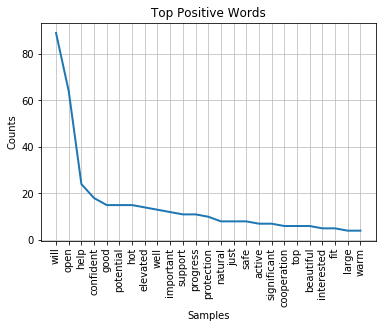

In [11]:
import nltk, matplotlib

posDist = nltk.FreqDist(posWordsList)
posDist.tabulate(10)

%matplotlib inline
posDist.plot(25, title="Top Positive Words")

# Plotting negative words:

       risk      danger suppression      threat     extreme    concerns        need       fight        hard     fatigue 
         33          26          23          14           8           5           5           4           4           4 


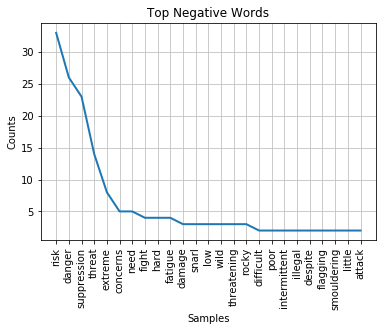

In [12]:
negDist = nltk.FreqDist(negWordsList)
negDist.tabulate(10)

%matplotlib inline
negDist.plot(25, title="Top Negative Words")

In [10]:
with open('BIGDATA.txt','r') as myfile:
    data_string=myfile.read().replace('\n','')
print("This string has", len(data_string), "characters.")

This string has 4212284 characters.


In [16]:
from textblob import TextBlob
testimonial = TextBlob(data_string) # any string (such as our sonnets)